In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [17]:
!wget https://raw.githubusercontent.com/spyderroque/IBM_Advance_Data_Science/main/Capstone/weather/Climate_day_train_feature.parquet

Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [18]:
df = pd.read_parquet('Climate_day_train_feature.parquet')
df.head()

Date  Wind_avg  Precepitation  sunshine_hours  snow_height  \
0  1991-01-01       4.5            7.1             3.7            0   
1  1991-01-02       9.2            3.8             0.0            0   
2  1991-01-03       5.3            9.2             0.0            0   
3  1991-01-04       6.2            0.4             4.1            0   
4  1991-01-05       7.7            2.9             1.1            0   

   Coverage_avg  Vapour_p_avg  Air_p_avg  Temp_avg  Rel_Humid_avg  Rain  Snow  \
0           4.7           7.0     1010.8       4.8           82.0     1     0   
1           7.3          10.7      996.7      11.4           81.0     1     0   
2           7.3           9.6     1001.9       8.6           85.0     1     0   
3           6.3           7.9     1003.5       6.8           79.0     1     0   
4           5.3           7.1     1000.4       6.6           74.0     1     0   

   RainAndSnow  
0            0  
1            0  
2            0  
3            0  
4            0

Following code has been inserted here as a result of an iteration in the Model Definition phase. All graphs with normalised data, are originally done during the Model Definition phase.

In [19]:
scaled_data = MinMaxScaler().fit_transform(np.array(df['Wind_avg']).reshape(-1,1))
temp1 =np.array(df.iloc[:,1:12])
scaled_data_array = MinMaxScaler().fit_transform(temp1)
column_headers = list(df.iloc[:,1:12].columns)
df_norm = pd.DataFrame(scaled_data_array, columns = column_headers)
df_norm['Date'] = df['Date']
df_norm = df_norm.reindex(columns = list(df.columns))
list(df.columns)
df_norm['RainAndSnow'] = df['RainAndSnow']
df_norm['Rain'] = df['Rain']
df_norm['Snow'] = df['Snow']

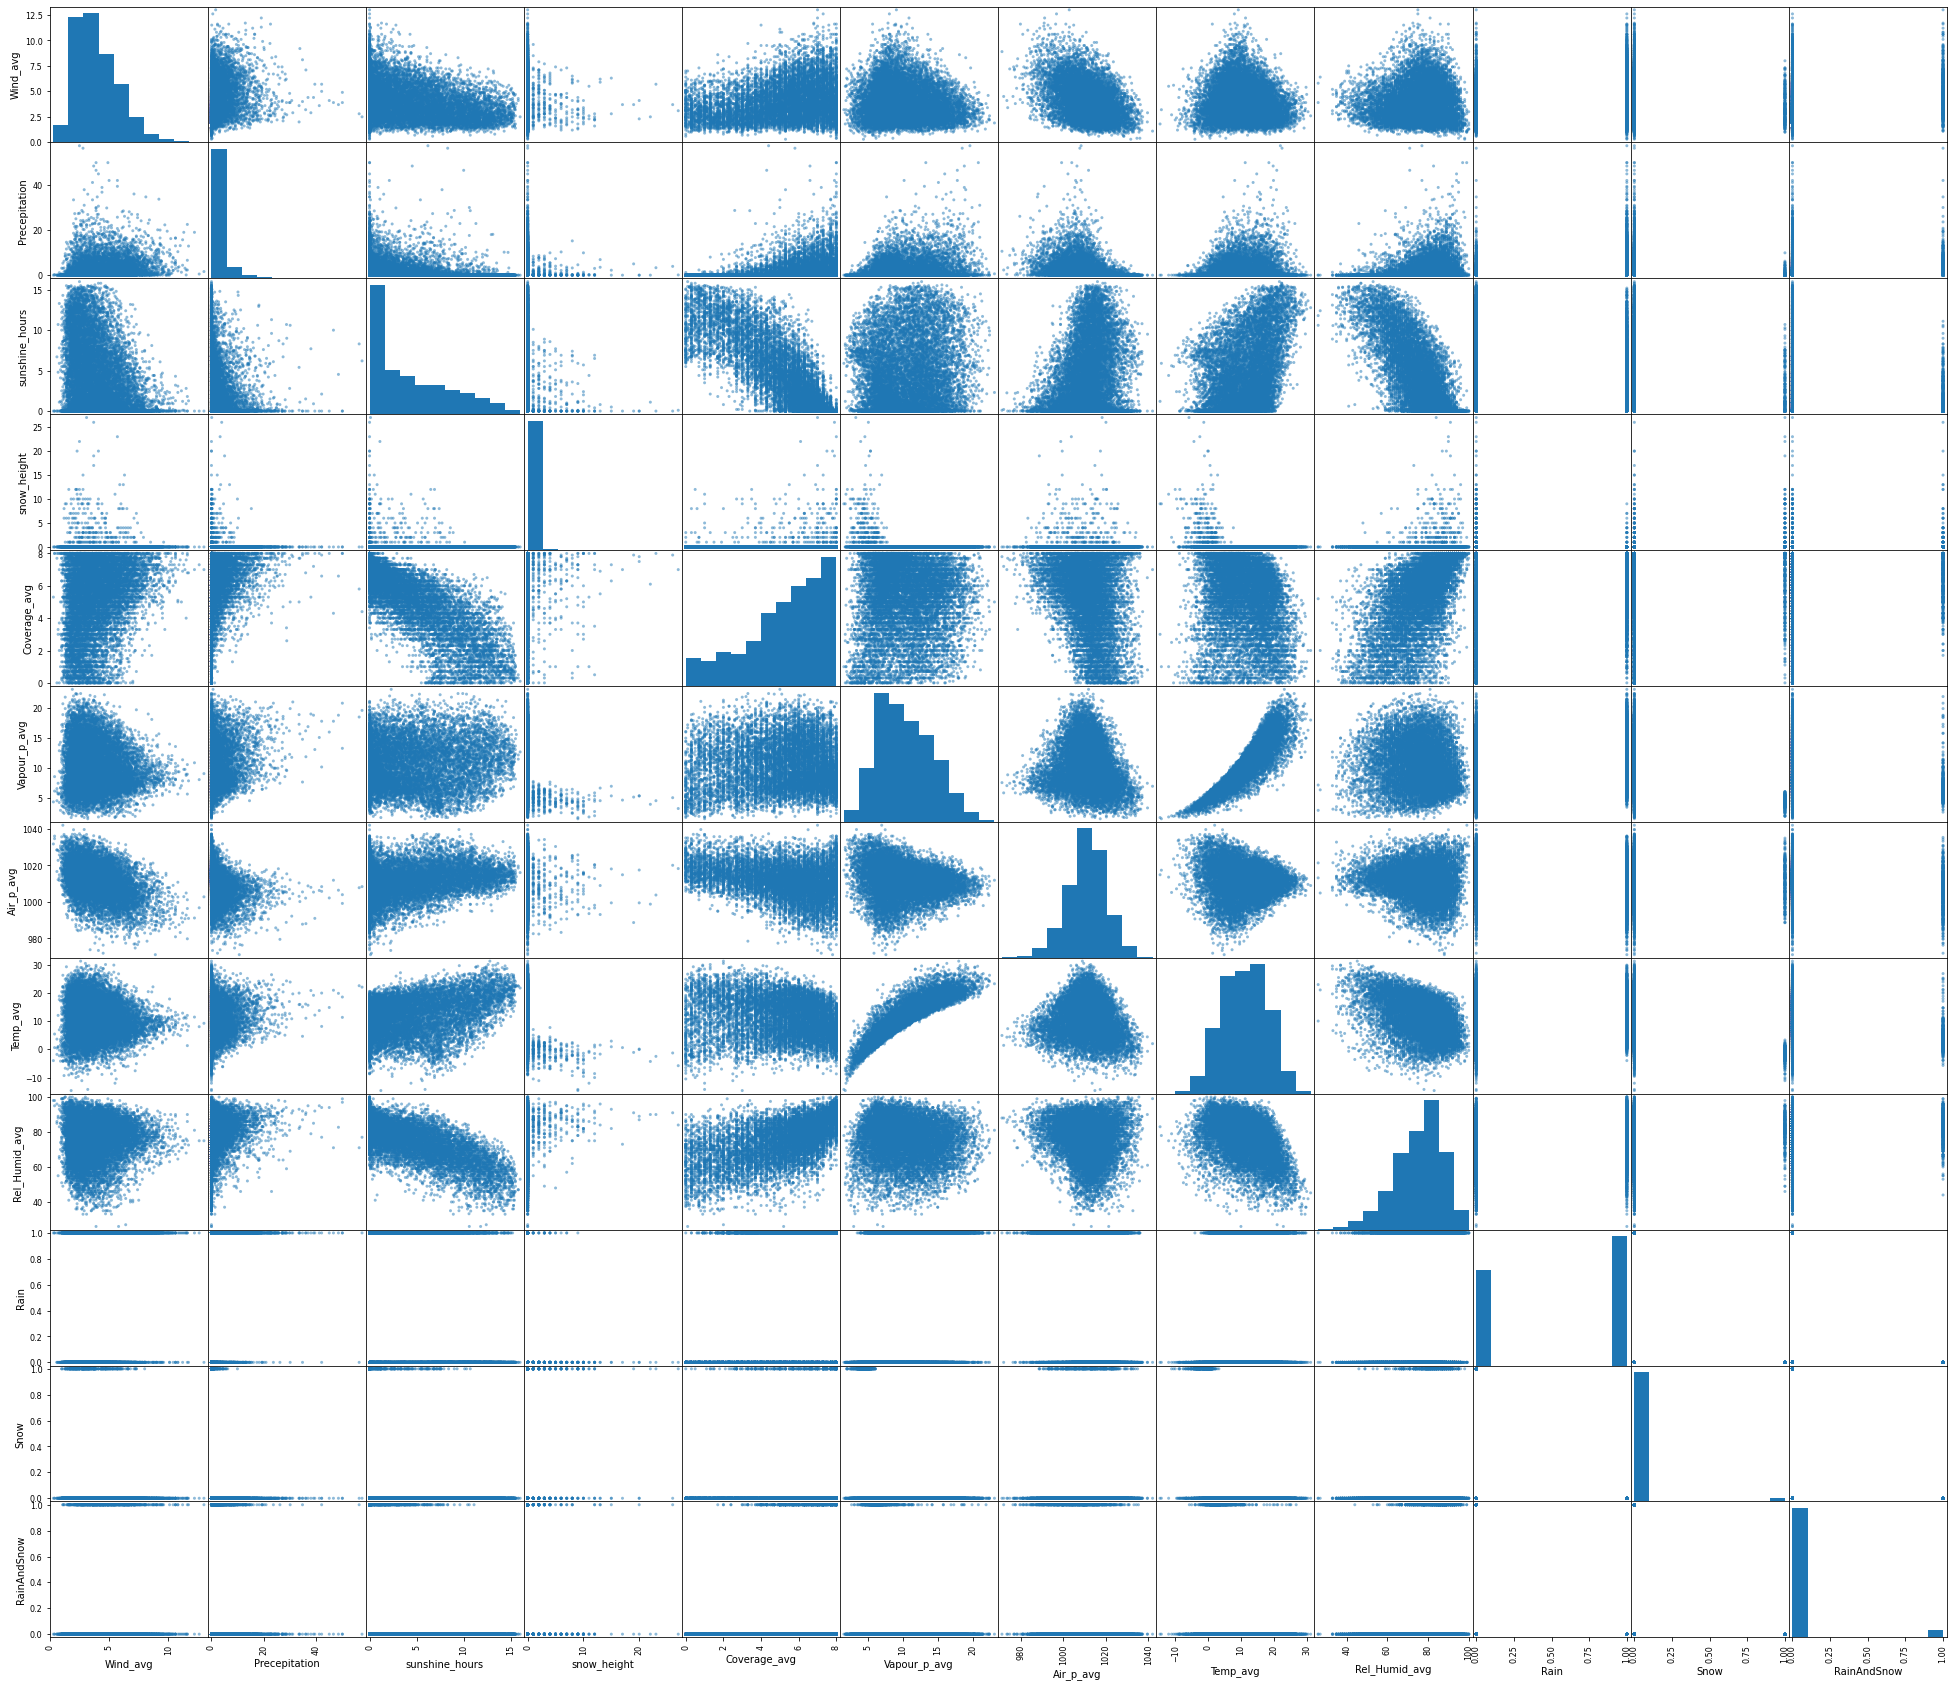

In [5]:
pd.plotting.scatter_matrix(df, figsize = (34,30))
plt.show()

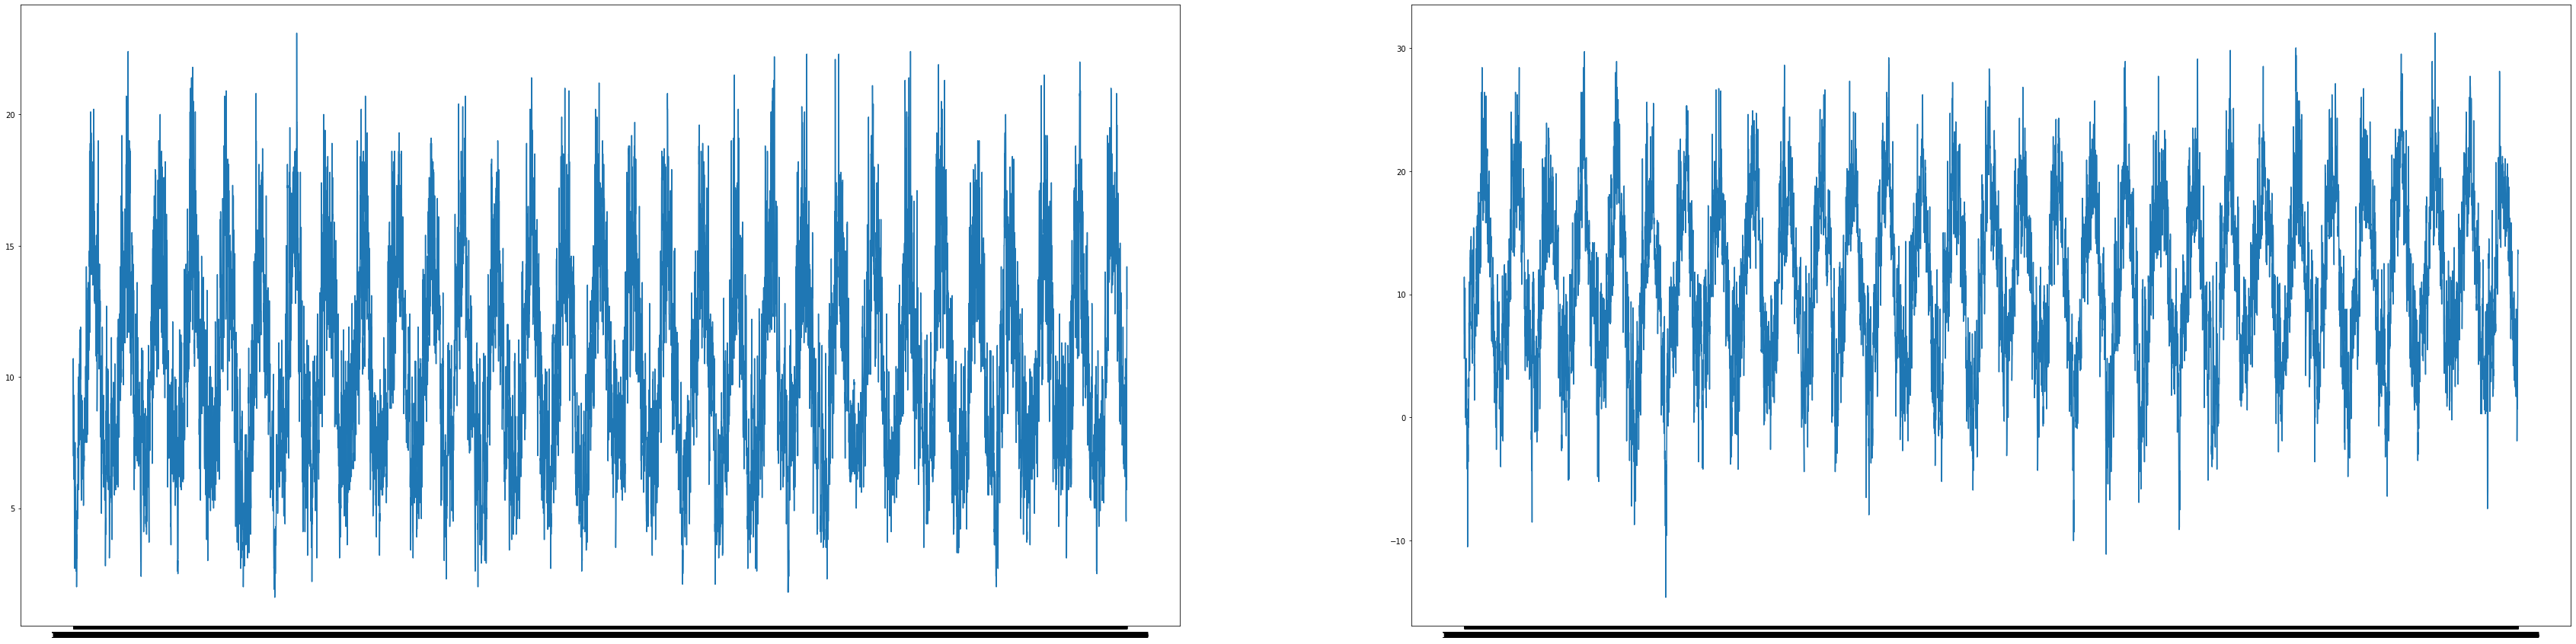

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(60,15))
ax1.plot(df['Date'],df['Vapour_p_avg'])
ax2.plot(df['Date'],df['Temp_avg'])
plt.show()

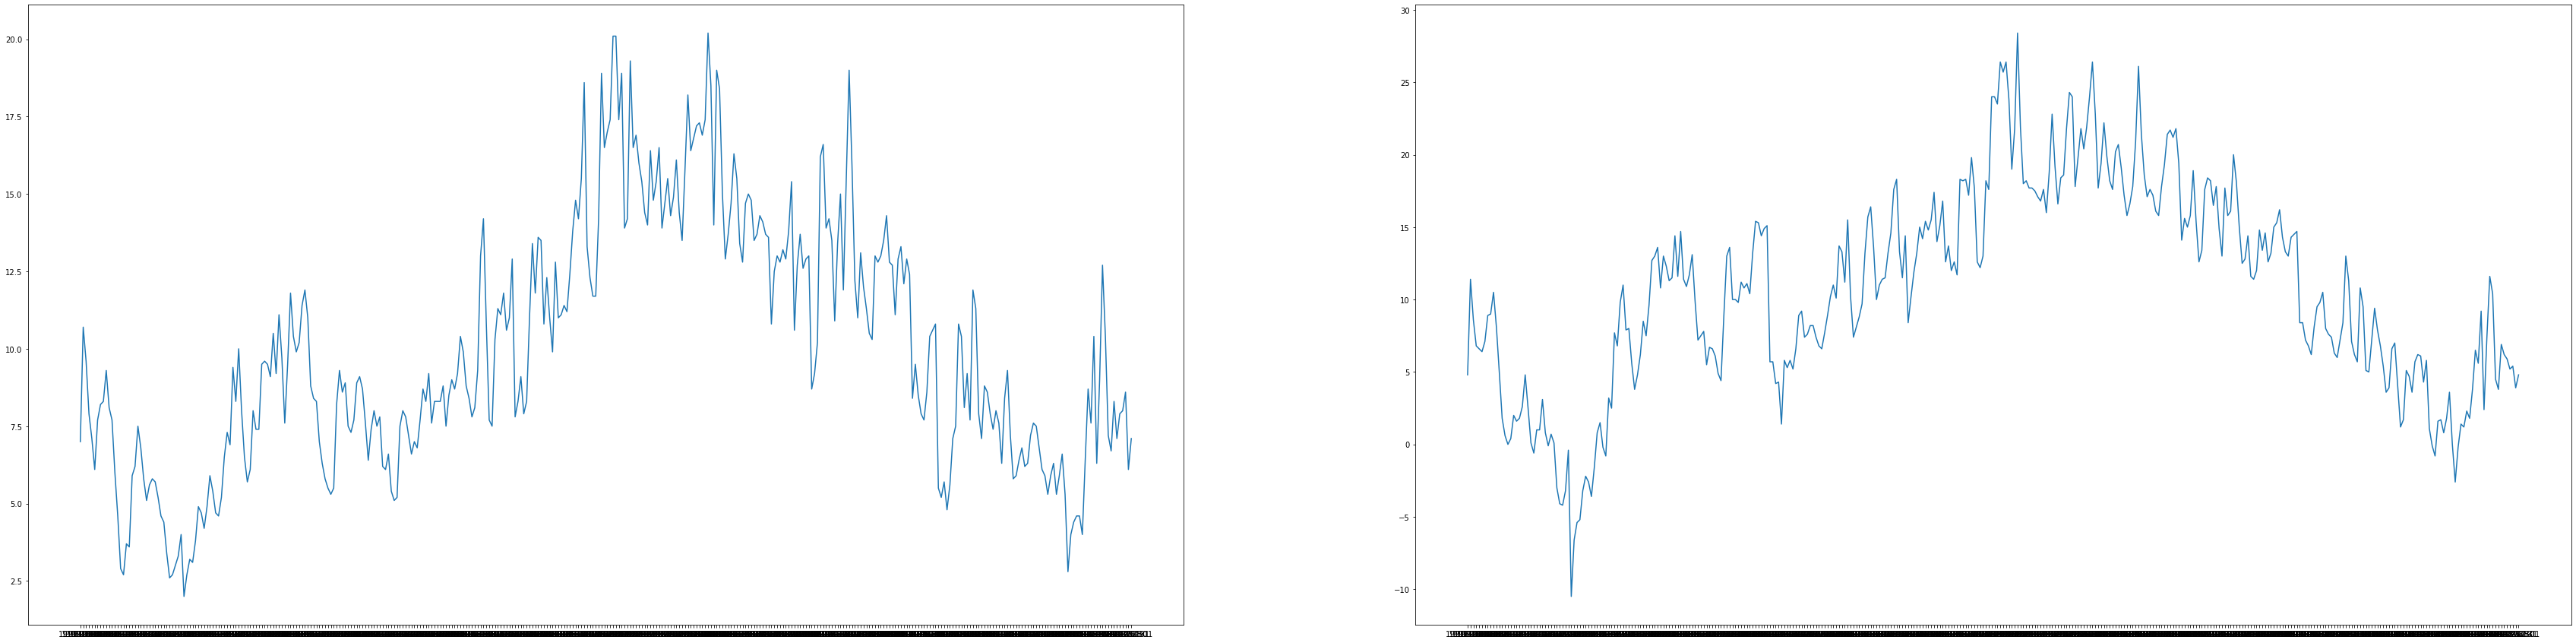

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(60,15))
ax1.plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Vapour_p_avg'])
ax2.plot(df.loc[0:365, 'Date'],df.loc[0:365, 'Temp_avg'])
plt.show()

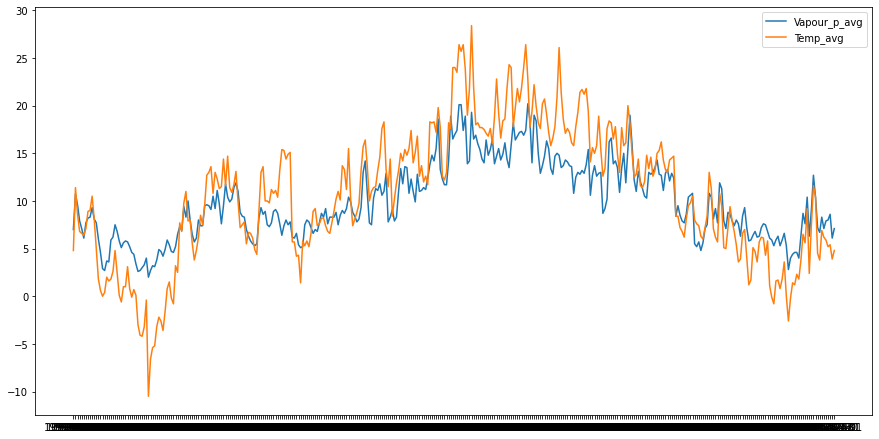

In [8]:
#fig, ax = plt.subplot(1,1)
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[0:365, 'Date'],df.loc[0:365, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df.loc[0:365, 'Date'],df.loc[0:365, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

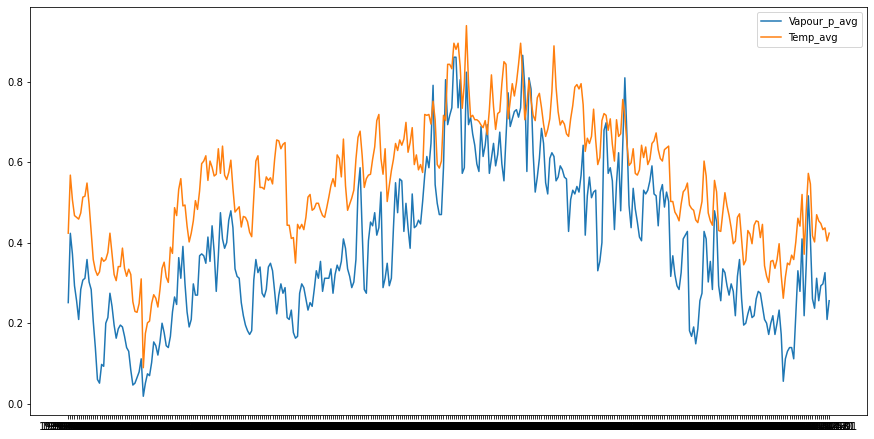

In [9]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

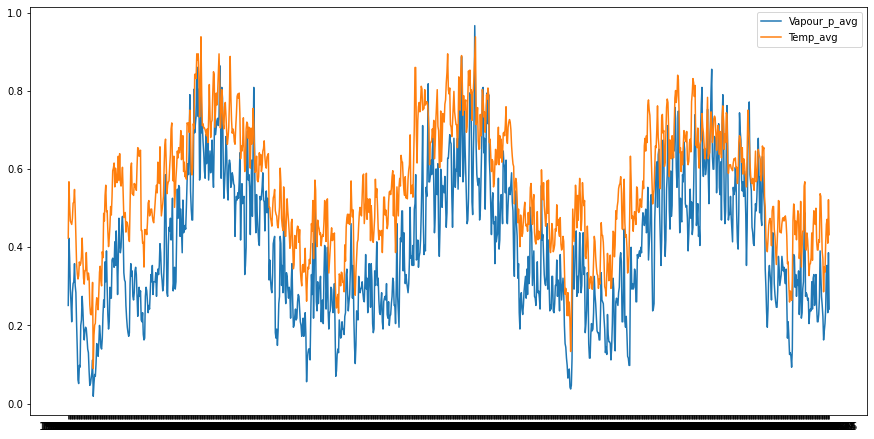

In [10]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[0:1095, 'Date'],df_norm.loc[0:1095, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[0:1095, 'Date'],df_norm.loc[0:1095, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

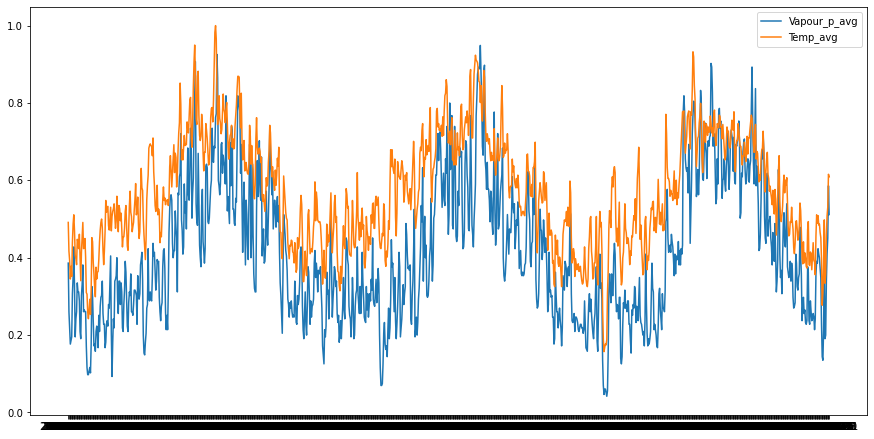

In [49]:
fig = plt.figure(figsize=(15,7.5))
temp2 = df.shape[0]
temp3 = df.shape[0]-1096
plt.plot (df_norm.loc[temp3:temp2, 'Date'],df_norm.loc[temp3:temp2, 'Vapour_p_avg'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[temp3:temp2, 'Date'],df_norm.loc[temp3:temp2, 'Temp_avg'], label = 'Temp_avg')
plt.legend()
plt.show()

In [ ]:
# The normalized average temperature and vapour pressure seem to be related quite some bit.

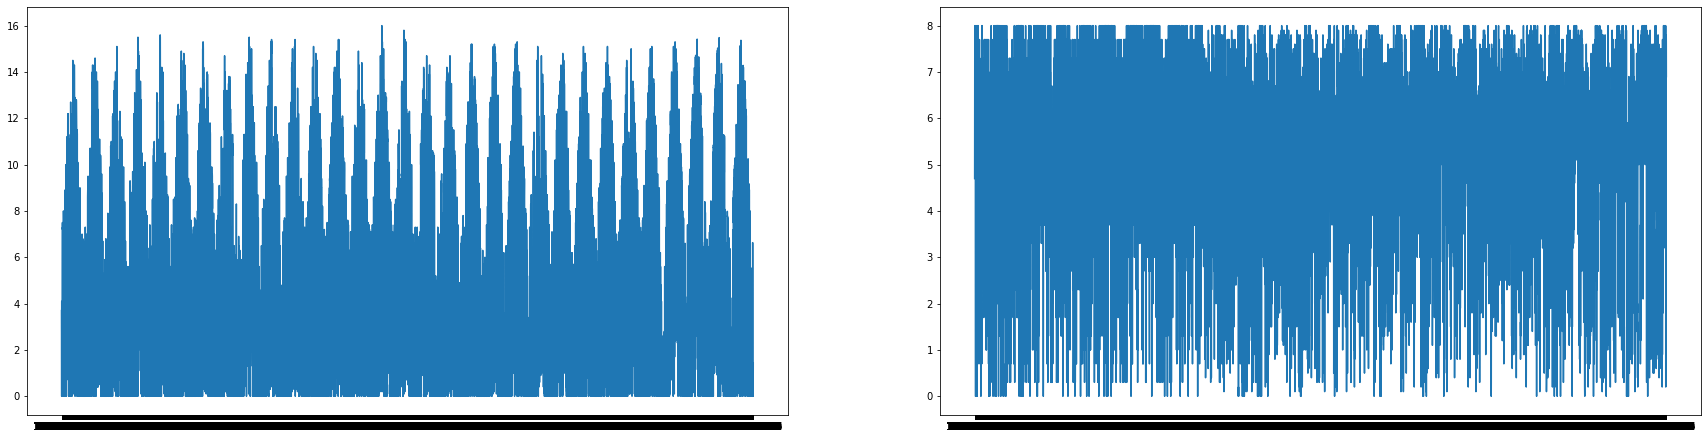

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,7.5))
ax1.plot(df['Date'],df['sunshine_hours'])
ax2.plot(df['Date'],df['Coverage_avg'])
plt.show()


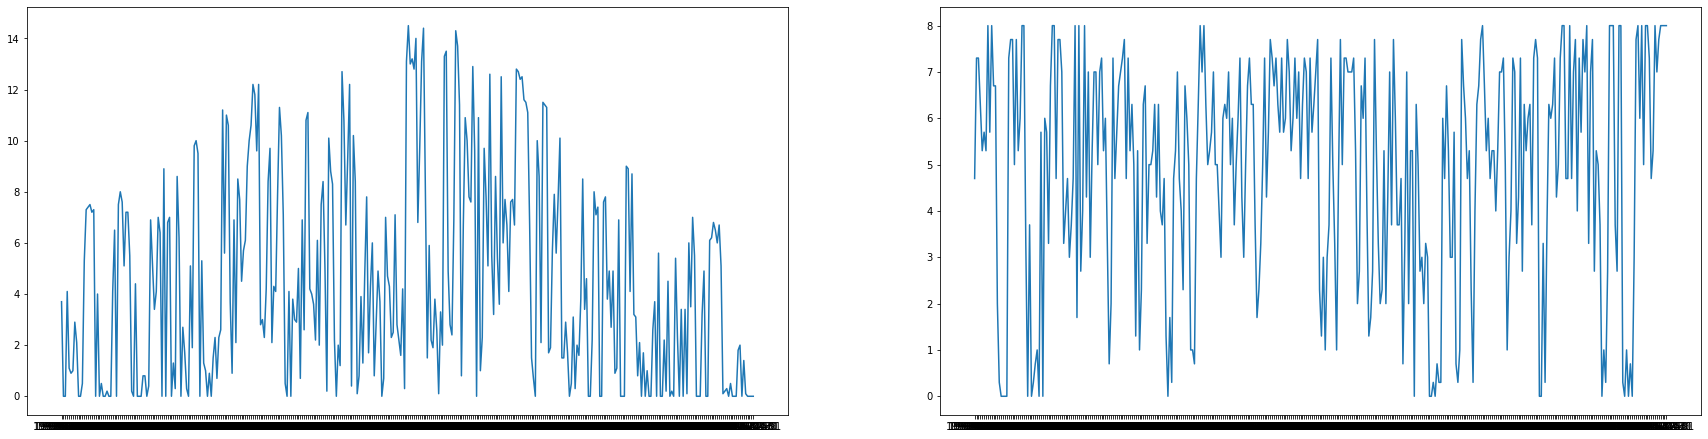

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,7.5))
ax1.plot(df.loc[0:365, 'Date'],df.loc[0:365, 'sunshine_hours'])
ax2.plot(df.loc[0:365,'Date'],df.loc[0:365, 'Coverage_avg'])
plt.show()

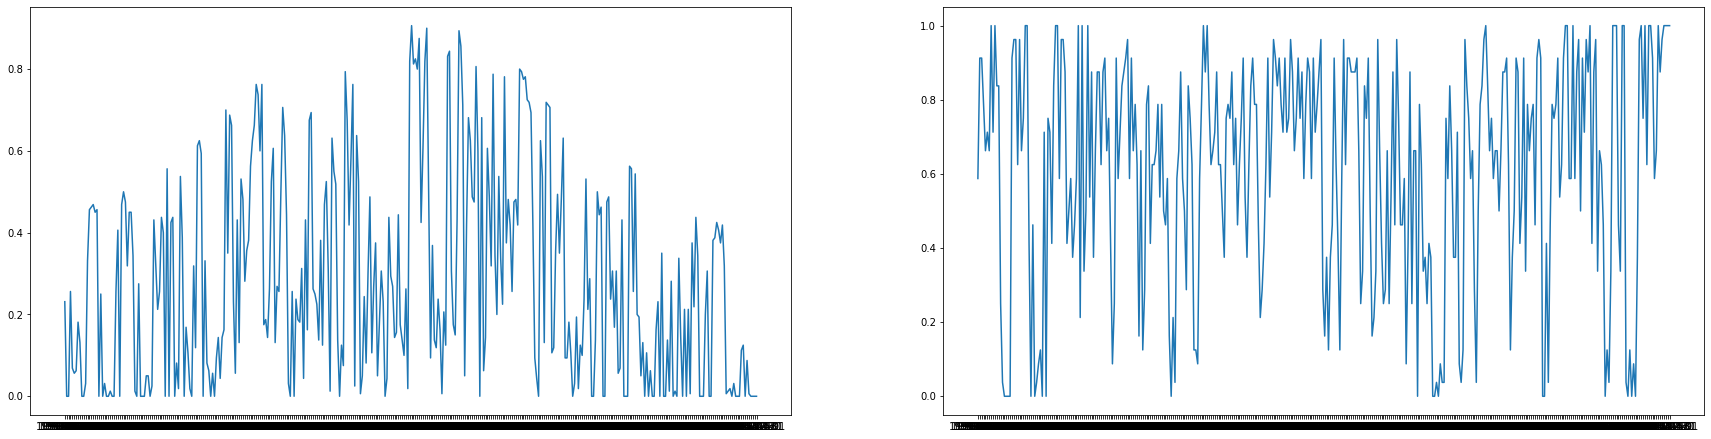

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(30,7.5))
ax1.plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'sunshine_hours'])
ax2.plot(df_norm.loc[0:365,'Date'],df_norm.loc[0:365, 'Coverage_avg'])
plt.show()

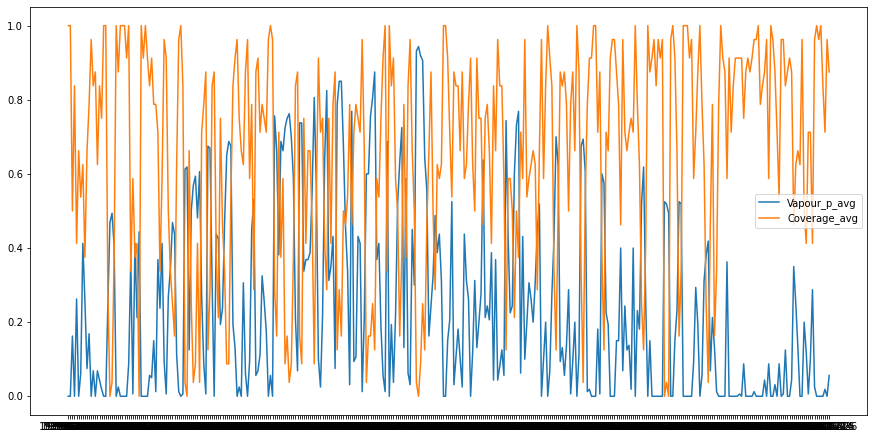

In [15]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[730:1095, 'Date'],df_norm.loc[730:1095, 'sunshine_hours'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[730:1095, 'Date'],df_norm.loc[730:1095, 'Coverage_avg'], label = 'Coverage_avg')
plt.legend()
plt.show()

In [20]:
# OK, that was not useful. what about plotting the inverse of Coverage_avg?

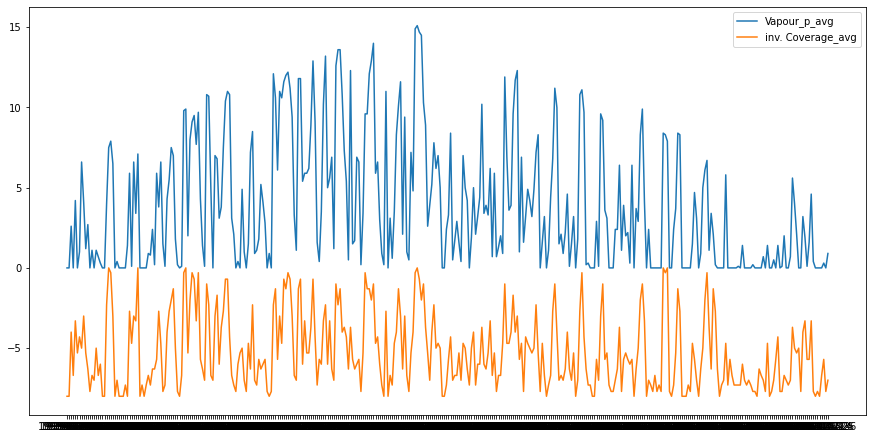

In [32]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[730:1095, 'Date'],df.loc[730:1095, 'sunshine_hours'], label = 'Vapour_p_avg')
plt.plot( df.loc[730:1095, 'Date'],-df.loc[730:1095, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

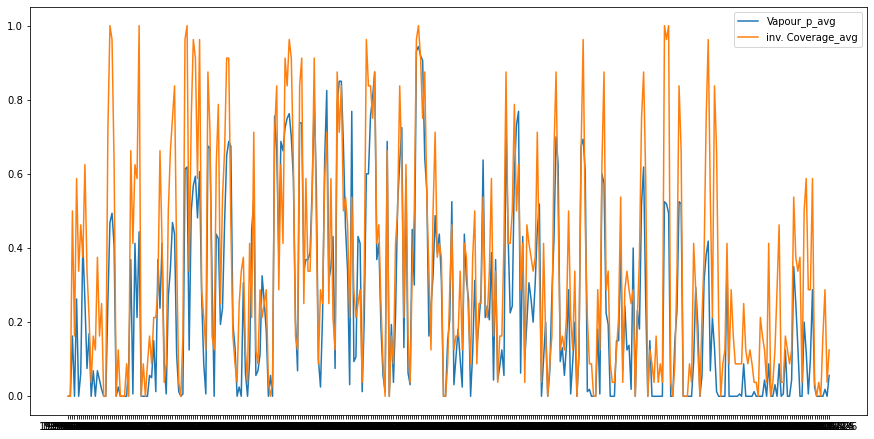

In [22]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df_norm.loc[730:1095, 'Date'],df_norm.loc[730:1095, 'sunshine_hours'], label = 'Vapour_p_avg')
plt.plot( df_norm.loc[730:1095, 'Date'],1-df_norm.loc[730:1095, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

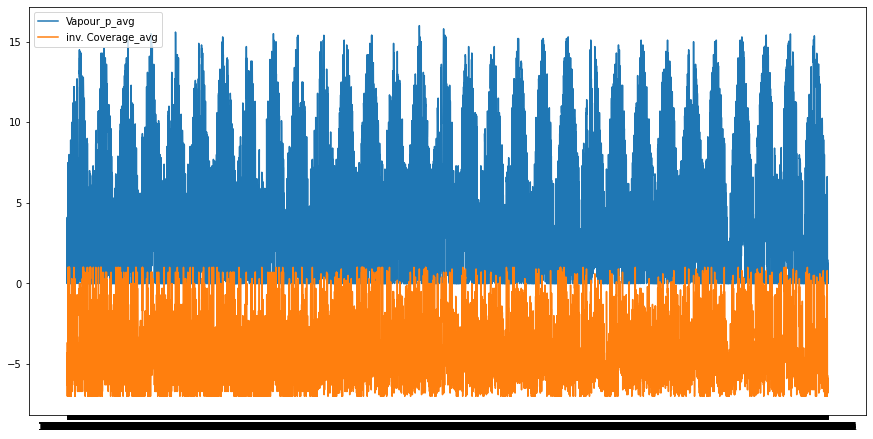

In [29]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[:, 'Date'],df.loc[:, 'sunshine_hours'], label = 'Vapour_p_avg')
plt.plot( df.loc[:, 'Date'],1-df.loc[:, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

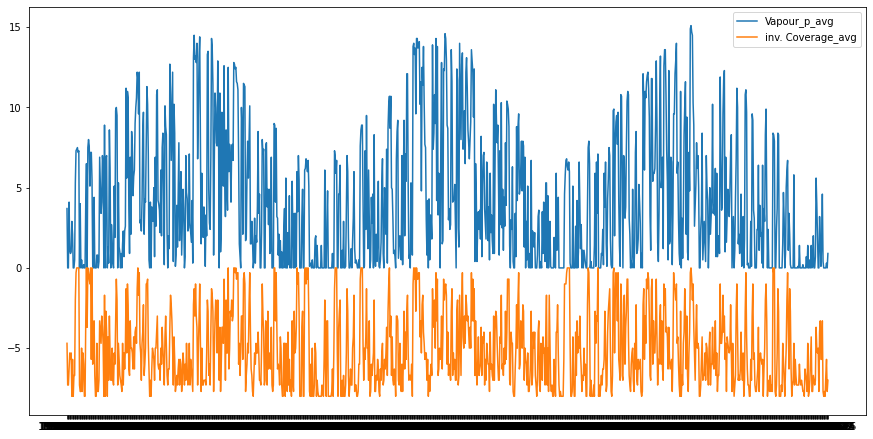

In [33]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[0:1095, 'Date'],df.loc[0:1095, 'sunshine_hours'], label = 'Vapour_p_avg')
plt.plot( df.loc[0:1095, 'Date'],-df.loc[0:1095, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

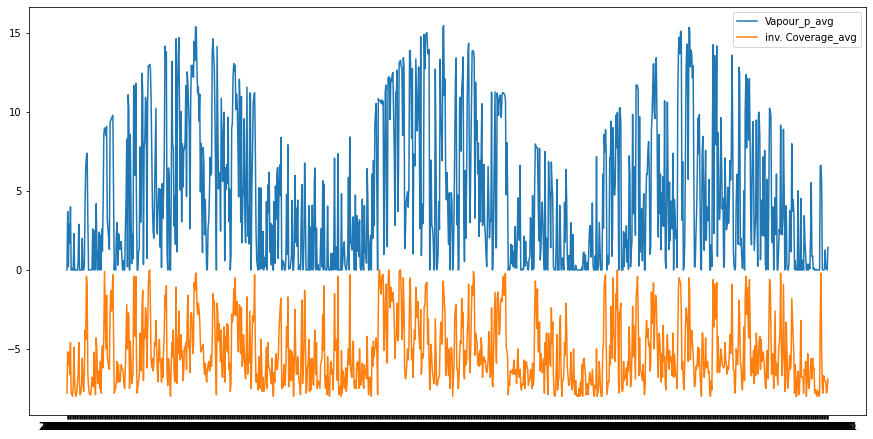

In [50]:
fig = plt.figure(figsize=(15,7.5))
plt.plot (df.loc[temp3:temp2, 'Date'],df.loc[temp3:temp2, 'sunshine_hours'], label = 'Vapour_p_avg')
plt.plot( df.loc[temp3:temp2, 'Date'],-df.loc[temp3:temp2, 'Coverage_avg'], label = 'inv. Coverage_avg')
plt.legend()
plt.show()

In [34]:
#looks like that vapour pressure is correlated to the inverse of the coverage and the angle of the earth to the sun!

ValueError: not enough values to unpack (expected 13, got 7)

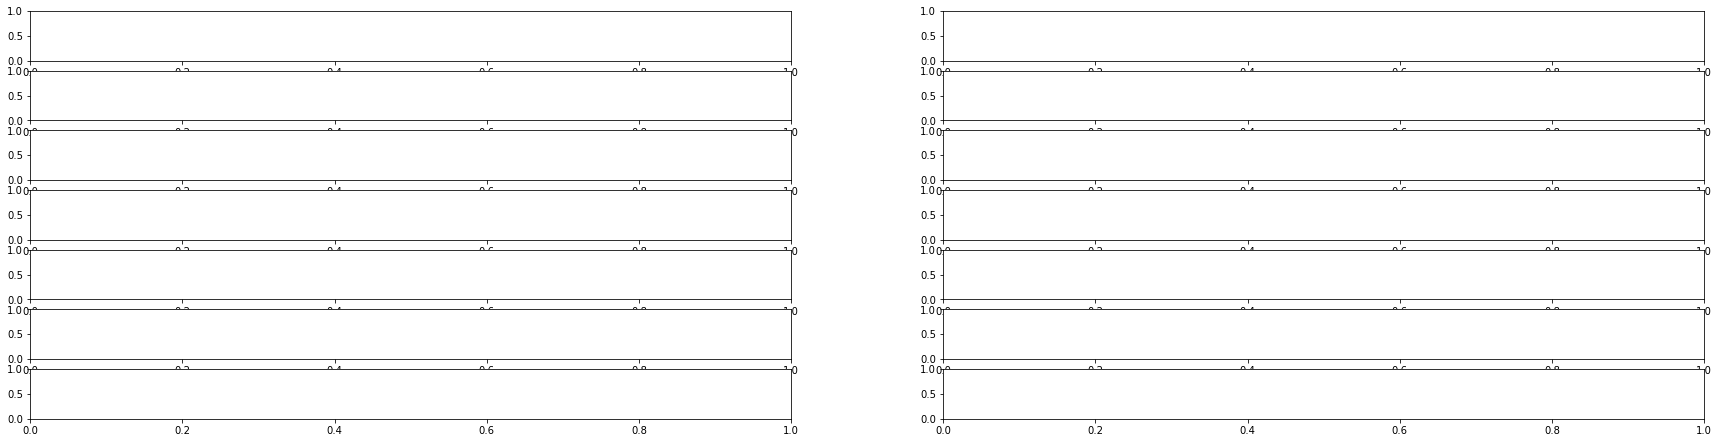

In [53]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 ) = plt.subplots(7,2, figsize=(30,7.5))
ax1.plot(df_norm.loc[0:365, 'Date'],df_norm.loc[0:365, 'sunshine_hours'],0)
ax2.plot(df_norm.loc[0:365,'Date'],df_norm.loc[0:365, 'Coverage_avg'],1)
plt.show()

AttributeError: 'int' object has no attribute 'plot'

c:\Users\sager\anaconda3\envs\waether2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


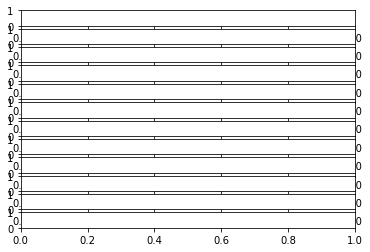

In [57]:
from cProfile import label


fig, ax = plt.subplots(nrows=7, ncols=2, constrained_layout=True)

for ax in range(0,13):
    ax.plot(df.loc[0:1095, 'Date'],df.iloc[0:1095, ax+1], collabel = df.columns(ax))
    ax.set_xlabel('Date', fontsize=12)
    ax.set_title('df.columns(ax)', fontsize=14)